# Naive Bayes Classifier – SMS Spam Detection

### Overview
Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem. It assumes independence between features (the “naive” part).

It works particularly well for text classification problems like spam detection.

---

### Bayes' Theorem:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:
- **P(A|B)** is the posterior probability of class A given feature B.
- **P(B|A)** is the likelihood.
- **P(A)** is the class prior probability.
- **P(B)** is the predictor prior probability.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



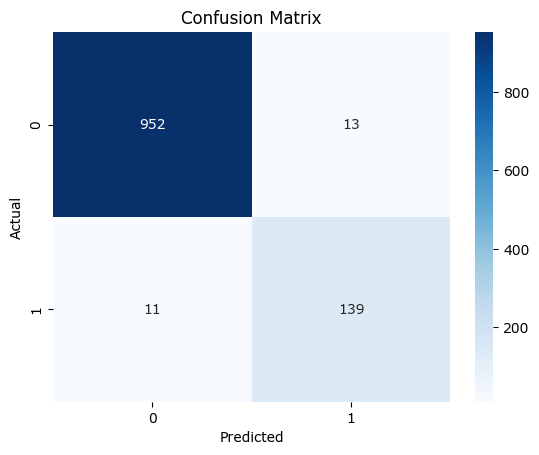

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Conclusion

- Naive Bayes achieved high accuracy on spam classification.
- It’s fast, simple, and effective for text-based tasks.
- Assumes independence between features, which isn’t always true but often works well in practice.

---

### Next Steps:
- Try `TfidfVectorizer` instead of `CountVectorizer`
- Test on different datasets (e.g., news classification, sentiment analysis)
